In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv('train_new.csv')
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Title,FamilySize
0,1,0,3,0,1.0,0,0.4
1,2,1,1,1,3.0,2,0.4
2,3,1,3,1,2.0,1,0.0
3,4,1,1,1,2.0,2,0.4
4,5,0,3,0,2.0,0,0.0


In [3]:
test_df = pd.read_csv('test_new.csv')
test_df.head()

,PassengerId,Pclass,Sex,Age,Title,FamilySize
0,892,3,0,2.0,0,0.0
1,893,3,1,3.0,2,0.4
2,894,2,0,4.0,0,0.0
3,895,3,0,2.0,0,0.0
4,896,3,1,1.0,2,0.8


### 학습 데이터 준비

In [4]:
target = train_df['Survived']
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [5]:
train_df = train_df.drop(['PassengerId', 'Survived'], axis=1)
train_df.head()

,Pclass,Sex,Age,Title,FamilySize
0,3,0,1.0,0,0.4
1,1,1,3.0,2,0.4
2,3,1,2.0,1,0.0
3,1,1,2.0,2,0.4
4,3,0,2.0,0,0.0


### K-fold 교차 검증

데이터를 랜덤하게 섞어 일부를 발췌한 데이터(Fold)를 K개를 생성하여 지정된 모델 하나를 K번 학습하고 예측 정확도를 측정하는 검증 기법.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [8]:
# 생성될 폴드들에 대한 데이터를 가지고 있는 객체
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [19]:
# 모델 객체 생성
model1 = KNeighborsClassifier()
model2 = DecisionTreeClassifier()
model3 = RandomForestClassifier()
model4 = GaussianNB()
model5 = SVC()
model6 = LogisticRegression()

In [10]:
# 교차 검증
score1 = cross_val_score(model1, train_df, target, cv=k_fold, n_jobs=1, scoring='accuracy')
score2 = cross_val_score(model2, train_df, target, cv=k_fold, n_jobs=1, scoring='accuracy')
score3 = cross_val_score(model3, train_df, target, cv=k_fold, n_jobs=1, scoring='accuracy')
score4 = cross_val_score(model4, train_df, target, cv=k_fold, n_jobs=1, scoring='accuracy')
score5 = cross_val_score(model5, train_df, target, cv=k_fold, n_jobs=1, scoring='accuracy')
score6 = cross_val_score(model6, train_df, target, cv=k_fold, n_jobs=1, scoring='accuracy')

C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 

In [13]:
import matplotlib.pyplot as plt

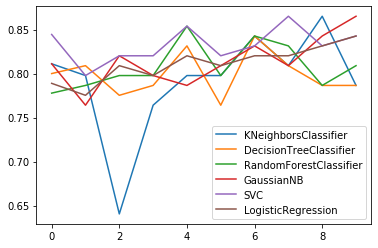

In [16]:
plt.plot(score1, label='KNeighborsClassifier')
plt.plot(score2, label='DecisionTreeClassifier')
plt.plot(score3, label='RandomForestClassifier')
plt.plot(score4, label='GaussianNB')
plt.plot(score5, label='SVC')
plt.plot(score6, label='LogisticRegression')
plt.legend()
plt.show()

In [18]:
import numpy as np

avg1 = round(np.mean(score1) * 100, 2)
avg2 = round(np.mean(score2) * 100, 2)
avg3 = round(np.mean(score3) * 100, 2)
avg4 = round(np.mean(score4) * 100, 2)
avg5 = round(np.mean(score5) * 100, 2)
avg6 = round(np.mean(score6) * 100, 2)

print(f'KNeighborsClassifier : {avg1}')
print(f'DecisionTreeClassifier : {avg2}')
print(f'RandomForestClassifier : {avg3}')
print(f'GaussianNB : {avg4}')
print(f'SVC : {avg5}')
print(f'LogisticRegression : {avg6}')


KNeighborsClassifier : 79.12
DecisionTreeClassifier : 79.91
RandomForestClassifier : 80.81
GaussianNB : 81.37
SVC : 83.28
LogisticRegression : 81.15


### 학습

In [20]:
model5.fit(train_df, target)

C:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [30]:
# 예측 결과를 가져온다.
test_data = test_df.drop('PassengerId', axis=1)
y_pred = model5.predict(test_data)

In [33]:
s1 = pd.Series(y_pred)
s1.value_counts()

0    262
1    156
dtype: int64

### 저장한다.

In [35]:
submission = pd.DataFrame({
    'PassengerId' : test_df['PassengerId'],
    'Survived' : y_pred
})
submission.to_csv('titanic_submission.csv', index=False)